## Вектора и Матрицы. Градиент##

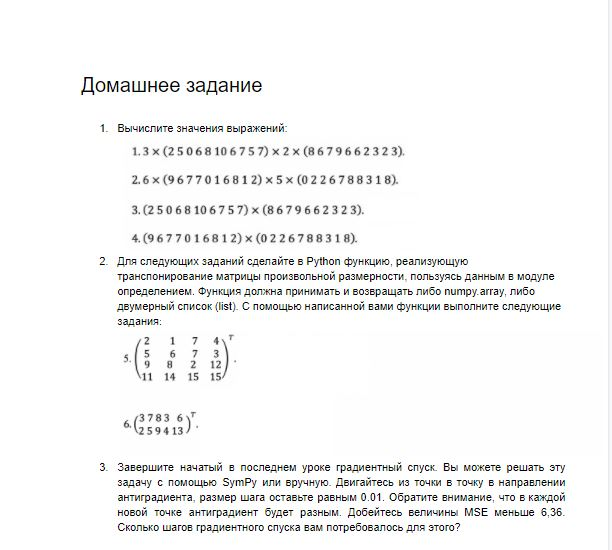

# Задание №1

1. 3 x (2,5,0,6,8,10,6,7,5,7) x 2 x (8,6,7,9,6,6,2,3,2,3) = 3 * 2  * (2 * 8 + 5 * 6 + 0 + 6 * 9 + 8 * 6 + 10 * 6 + 6 * 2 + 7 * 3 + 5 * 2 + 7 * 3) = 6 * 272 = 1632
2. 6 x (9,6,7,7,0,1,6,8,1,2) x 5 x (0,2,2,6,7,8,8,3,1,8) = 6 * 5 * (9 * 0 + 6 * 2 + 7 * 2 + 7 * 6 + 0 * 7 + 1 * 8 + 6 * 8 + 8 * 3 + 1 * 1 + 2 * 8) = 30 * 165 = 4950
3. (2,5,0,6,8,10,6,7,5,7) x (8,6,7,9,6,6,2,3,2,3) = (2 * 8 + 5 * 6 + 0 * 7 + 6 * 9 + 8 * 6 + 10 * 6 + 6 * 2 + 7 * 3 + 5 * 2 + 7 * 3) = 272
4. (9,6,7,7,0,1,6,8,1,2) x (0,2,2,6,7,8,8,3,1,8) = (9 * 0 + 6 * 2 + 7 * 2 + 7 * 6 + 0 * 7 + 1 * 8 + 6 * 8 + 8 * 3 + 1 * 1 + 2 * 8) = 165

In [11]:
import numpy as np
from sympy import *

# Задание №2

In [12]:
def transp(A):
    A_tr = np.zeros((A.shape[1], A.shape[0]), dtype=np.int8)

    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            A_tr[j, i] = A[i, j]
    return A_tr

In [13]:
arr1 = np.array([
    [2, 1, 7, 4],
    [5, 6, 7, 3],
    [9, 8, 2, 12],
    [11, 14, 15, 15]
])
arr1

array([[ 2,  1,  7,  4],
       [ 5,  6,  7,  3],
       [ 9,  8,  2, 12],
       [11, 14, 15, 15]])

In [14]:
arr2 = np.array([
    [3, 7, 8, 3, 6],
    [2, 5, 9, 4, 13]
])
arr2

array([[ 3,  7,  8,  3,  6],
       [ 2,  5,  9,  4, 13]])

In [15]:
transp(arr1)

array([[ 2,  5,  9, 11],
       [ 1,  6,  8, 14],
       [ 7,  7,  2, 15],
       [ 4,  3, 12, 15]], dtype=int8)

In [16]:
transp(arr2)

array([[ 3,  2],
       [ 7,  5],
       [ 8,  9],
       [ 3,  4],
       [ 6, 13]], dtype=int8)

# Задание №3

In [17]:
a1, a2 = symbols('a1, a2')

In [18]:
MSE = 1 / 4 * ((1 * a1 + 2 * a2 - 5)**2 + \
               (5 * a1 + 3 * a2 - 6)**2 + \
               (2 * a1 + 4 * a2 - 10)**2 + \
               (3 * a1 + 7 * a2 - 8)**2)
MSE.subs({a1: 0.57, a2: 0.91})

8.56082500000000

In [19]:
MSEa1 = diff(MSE, a1)
MSEa1

19.5*a1 + 23.0*a2 - 39.5

In [43]:
MSEa2 = diff(MSE, a2)
MSEa2

23.0*a1 + 39.0*a2 - 62.0

In [44]:
step = 0.01

In [45]:
numpy.array([1, 3]) - numpy.array([2, 1])

array([-1,  2])

In [20]:
x1, x2, y = symbols('x1, x2, y')
a0, a1, a2 = symbols('a0, a1, a2')

In [21]:
arr_values = np.array([
    [2, 1, 5],
    [3, 5, 6],
    [4, 2, 10],
    [7, 3, 8]
])

In [24]:
def mse(f, arr_values):
    list_xy = [x2, x1, y]
    f_eq = f - y
    MSE = 0
    for row in arr_values:
        MSE += f_eq.subs(dict(zip(list_xy, row)))**2

    MSE = MSE*1/arr_values.shape[0]
    return MSE

In [25]:
mse(f, arr_values)

(a1 + 2*a2 - 5)**2/4 + (2*a1 + 4*a2 - 10)**2/4 + (3*a1 + 7*a2 - 8)**2/4 + (5*a1 + 3*a2 - 6)**2/4

In [26]:
diff(MSE, a1)

19.5*a1 + 23.0*a2 - 39.5

In [27]:
diff(MSE, a2)

23.0*a1 + 39.0*a2 - 62.0

In [28]:
def gradient_descent(arr_values, first_point=np.array([0,0]), target_MSE=10, step = 0.01):
    f = a2*x2 + a1*x1
    list_k = [a1, a2]
    
    MSE = mse(f, arr_values)
    gradient = np.array([diff(MSE, a1), diff(MSE, a2)])
    
    step_num = 0
    cur_point = first_point
    cur_MSE = MSE.subs(dict(zip(list_k, cur_point)))
    print(f'step: {step_num}, MSE: {cur_MSE}')
    while cur_MSE > target_MSE:
        step_num += 1
        anti_grad = (-1) * np.array([gradient[0].subs(dict(zip(list_k, cur_point))), 
                                     gradient[1].subs(dict(zip(list_k, cur_point)))]) * step
        print(f'step: {step_num}, anti_grad: {anti_grad}')
        cur_point = cur_point + anti_grad
        cur_MSE = MSE.subs(dict(zip(list_k, cur_point)))
        print(f'step: {step_num}, MSE: {cur_MSE}')

In [29]:
gradient_descent(arr_values, target_MSE=6.36)

step: 0, MSE: 225/4
step: 1, anti_grad: [0.395000000000000 0.620000000000000]
step: 1, MSE: 16.8572437500000
step: 2, anti_grad: [0.175375000000000 0.287350000000000]
step: 2, MSE: 8.59365482859375
step: 3, anti_grad: [0.0750863750000000 0.134947250000000]
step: 3, MSE: 6.85191449679268
step: 4, anti_grad: [0.0294066643750000 0.0650479562500000]
step: 4, MSE: 6.47725148826285
step: 5, anti_grad: [0.00871133488437501 0.0329157205062501]
step: 5, MSE: 6.38978037646670
step: 6, anti_grad: [-0.000557991134515632 0.0180749824854063]
step: 6, MSE: 6.36322055427526
step: 7, anti_grad: [-0.00460642883492852 0.0111540772770364]
step: 7, MSE: 6.35010849011796
